In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import psutil
from plotnine import *
from IPython.core.display import display, HTML
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
#the sample dataset
tickets = pd.read_csv('data/hacknight_ticket_sample_data_2015.csv', low_memory=False, parse_dates=['issue_date', 'ticket_queue_date'])

In [9]:
notice_count = tickets['notice_level'].value_counts()
notice_count

VIOL    14471
SEIZ     9422
DETR     6245
FINL     4294
DLS      2275
Name: notice_level, dtype: int64

In [5]:
#make separate df for categories
tickets_SEIZ_only = tickets[tickets.notice_level == "SEIZ"]
tickets_SEIZ_only

,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
1,65543631,2015-01-10 17:09:00,423 N LARAMIE,13d93046fb2c3bc2d79baa8647d620d0c5a65fdc223cb9...,IL,PAS,606394357,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,15,CPD,CHRY,60,120,146.40,0.00,Notice,2015-01-28,SEIZ,NaN,5109291290,16391,"400 n laramie, chicago, il"
4,9189537354,2015-10-28 16:26:00,2410 N MONTICELLO AV,f0858c838c8cabda4e8fd3e0425a6c330a76e006f9de01...,IL,PAS,60625,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,729,Miscellaneous,TOYT,50,100,0.00,100.00,Paid,2016-01-27,SEIZ,NaN,5168404170,1407,"2400 n monticello av, chicago, il"
8,66116401,2015-08-15 22:46:00,3100 W FILLMORE,1a6f9bfd652493a4bb6d0beeb5fa3e7872a38983c57aa3...,IL,PAS,606232113,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",11,CPD,BUIC,200,400,488.00,0.00,Notice,2016-10-03,SEIZ,NaN,5193679090,19533,"3100 w fillmore, chicago, il"
9,66291855,2015-11-24 23:24:00,6537 S CALUMET,8c4c93c8038966384c51d4e68416f3cb69a8e4631524ee...,WI,PAS,535113434,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,3,CPD,OLDS,60,120,146.40,0.00,Notice,2015-12-17,SEIZ,NaN,5185329810,15766,"6500 s calumet, chicago, il"
15,9188878506,2015-05-20 09:25:00,3801 N FREMONT,568f64f8c645a354725e3b86eaf6cd4ecad7d36dbab21f...,IL,PAS,60640,0964040B,STREET CLEANING,498,DOF,HOND,60,120,146.40,0.00,Notice,2015-05-28,SEIZ,NaN,5061140550,714,"3800 n fremont, chicago, il"
28,9189570641,2015-10-31 15:10:00,2540 W DIVISION,c0df89e15d857feea5118e1330da4f8146ef79beb300e8...,IA,PAS,510220105,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,729,Miscellaneous,HOND,50,100,0.00,122.00,Paid,2016-07-07,SEIZ,NaN,5193296260,1407,"2500 w division, chicago, il"
33,9189679052,2015-11-23 21:44:00,352 E WALTON ST,b87c8a670d19263d52007ef65e4dfba0d4cdbd37e5bf20...,IL,PAS,606412248,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,729,Miscellaneous,PONT,65,130,158.60,0.00,Notice,2015-12-02,SEIZ,NaN,5185149370,1424,"300 e walton st, chicago, il"
34,9188767045,2015-04-29 14:39:00,3025 N HALSTED ST,05ba77dfb1aeb005840e2b0095da1b570070ea0236f812...,IL,PAS,606577211,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,498,DOF,FORD,50,100,0.00,122.00,Paid,2017-10-31,SEIZ,NaN,5183649580,794,"3000 n halsted st, chicago, il"
43,65583845,2015-04-01 00:26:00,3610 W DOUGLAS BLVD,b068684ccd557884cefc77c708e38fb8d5f9c0a5282126...,IL,TMP,60623,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,10,CPD,PONT,60,120,146.40,0.00,Notice,2015-04-08,SEIZ,NaN,5185726240,9006,"3600 w douglas blvd, chicago, il"
59,65825848,2015-04-12 16:07:00,2100 S PULASKI,b1801232ba092a8ce35039b4f8f7c1bc13b01c16cd4777...,IL,PAS,606513145,0964100D,DISABLED CURB CUT,10,CPD,CHEV,75,150,183.00,0.00,Notice,2015-04-22,SEIZ,NaN,5075039420,8820,"2100 s pulaski, chicago, il"


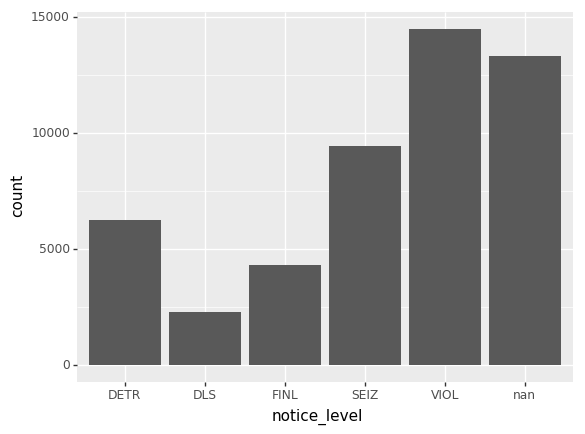

<ggplot: (299265021)>

In [34]:
#create count of all the different notice levels
(ggplot(tickets, aes(x='notice_level'))
 + geom_bar()
)

/Users/PrincessO/GitHub/il-tickets/venv/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 93'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/Users/PrincessO/GitHub/il-tickets/venv/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_bin : Removed 39 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/Users/PrincessO/GitHub/il-tickets/venv/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 12 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


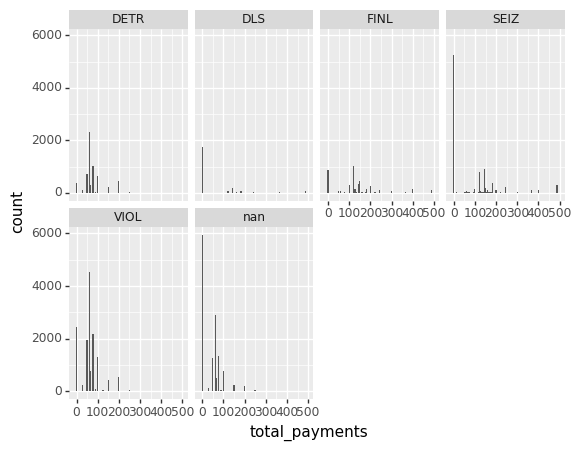

<ggplot: (-9223372036551550092)>

In [30]:
fig = (
    ggplot(tickets.dropna(subset = ['total_payments'])) +
    geom_histogram(aes(x = 'total_payments')) +
     scale_x_continuous(
        limits = (-10, 500)
       # labels = labels(0, 0.14, 0.02),
        #breaks = breaks(0, 0.14, 0.02)
    ) +
    facet_wrap('~notice_level', ncol = 4)
)
fig

/Users/PrincessO/GitHub/il-tickets/venv/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 157'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/Users/PrincessO/GitHub/il-tickets/venv/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_bin : Removed 320 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/Users/PrincessO/GitHub/il-tickets/venv/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 12 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


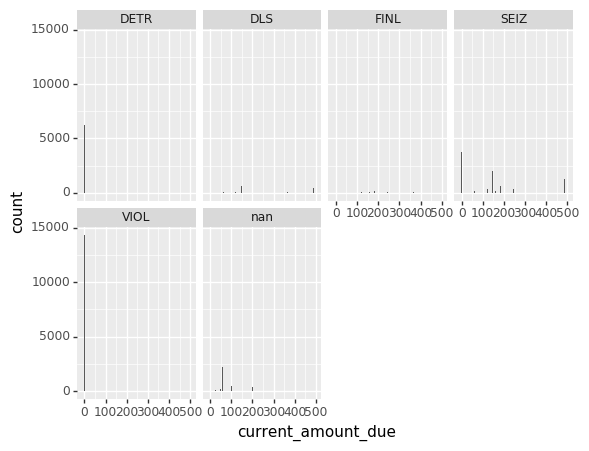

<ggplot: (302629622)>

In [31]:
#ok now do the same thing for current amount due

fig = (
    ggplot(tickets.dropna(subset = ['current_amount_due'])) +
    geom_histogram(aes(x = 'current_amount_due')) +
     scale_x_continuous(
        limits = (-10, 500)
       # labels = labels(0, 0.14, 0.02),
        #breaks = breaks(0, 0.14, 0.02)
    ) +
    facet_wrap('~notice_level', ncol = 4)
)
fig

/Users/PrincessO/GitHub/il-tickets/venv/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 30'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/Users/PrincessO/GitHub/il-tickets/venv/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_bin : Removed 72 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/Users/PrincessO/GitHub/il-tickets/venv/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 3 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


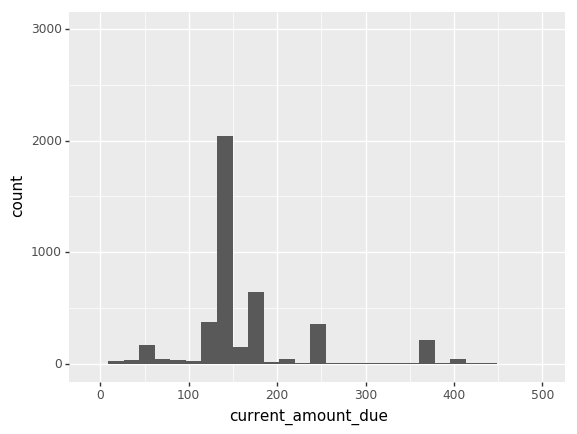

<ggplot: (303148755)>

In [56]:
fig2 = (
    ggplot(tickets_SEIZ_only.dropna(subset = ['current_amount_due'])) +
    geom_histogram(aes(x = 'current_amount_due'))+
     scale_x_continuous(
        limits = (-10, 500))+ 
    scale_y_continuous(
        limits = (-10, 3000))
    ) 
fig2

/Users/PrincessO/GitHub/il-tickets/venv/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 157'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/Users/PrincessO/GitHub/il-tickets/venv/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_bin : Removed 320 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/Users/PrincessO/GitHub/il-tickets/venv/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 3 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


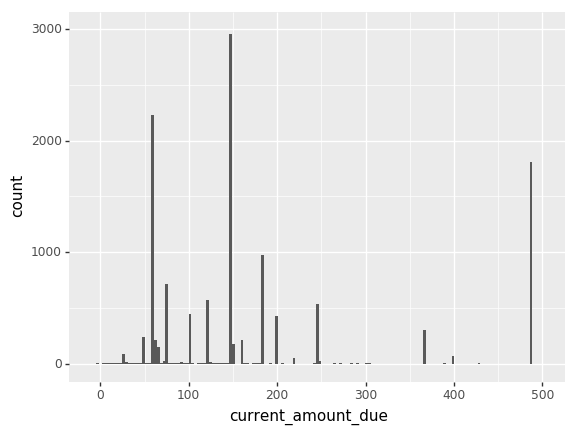

<ggplot: (299265754)>

In [55]:
fig3 = (
    ggplot(tickets.dropna(subset = ['current_amount_due'])) +
    geom_histogram(aes(x = 'current_amount_due'))+
     scale_x_continuous(
        limits = (-10, 500)) + 
    scale_y_continuous(
        limits = (-10, 3000))
    ) 
fig3